In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [293]:
data_dir = "../../datasets/ticket_cancel/tickets.csv"

In [294]:
df = pd.read_csv(data_dir)
df

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-06-01 00:20:14.280,NaN,2022-06-04 12:10:00,37579327,1050781.0,5,NaN,True,5900000.0,0.0,...,1,بوئینگ 737,False,Int,Plane,0,NaN,NaN,605105141718,103215806
101013,2022-10-29 20:54:31.330,NaN,2022-11-01 15:30:00,39789479,3085407.0,2,403095.0,True,926500.0,0.0,...,1,4 ستاره اتوبوسي نگين,NaN,Work,Train,0,NaN,NaN,414997568556,193262890
101014,2022-09-03 17:57:22.067,NaN,2022-09-13 09:30:00,38991563,2322052.0,5,528307.0,True,30000000.0,0.0,...,0,NaN,False,Int,InternationalPlane,0,47b8f2d9b5de7e0e0e7234c18a1aa0c4b35798e6cb46b4...,a4dcb7941ee3c8f7b1fc6a171015692bc961d65a84ad47...,99460830937,34732401
101015,2022-09-29 13:15:51.303,NaN,2022-09-29 17:30:00,39406503,7664730.0,3,797946.0,True,980000.0,0.0,...,1,25 نفره (VIP),True,Work,Bus,0,NaN,718bc52c3e88520531463b385998a1193e2821d518b60b...,487489926847,458338866


In [295]:
df = df.drop(columns=["CancelTime", "HashPassportNumber_p", "HashEmail", "BuyerMobile", "BillID", "TicketID", "NationalCode", "UserID", "From", "To"])
df["TimeDelta"] = (pd.to_datetime(df["DepartureTime"]) - pd.to_datetime(df["Created"]))
df[100:600]

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,TimeDelta
100,2022-11-01 21:44:00.230,2022-11-02 06:00:00,5,True,7940000.0,59550.0,1,بوئینگ MD83,False,Work,Plane,0,0 days 08:15:59.770000
101,2022-10-15 14:27:52.160,2022-10-19 21:40:00,5,True,11745000.0,0.0,1,بوئینگ MD83,False,Work,Plane,0,4 days 07:12:07.840000
102,2022-08-17 08:43:20.653,2022-08-18 18:25:00,2,True,3518000.0,0.0,1,4 ستاره 4 تخته طلائيه,NaN,Work,Train,0,1 days 09:41:39.347000
103,2022-10-07 18:03:02.843,2022-10-15 14:35:00,5,False,6963000.0,0.0,1,فوکر 100,False,Int,Plane,0,7 days 20:31:57.157000
104,2022-09-16 14:40:36.030,2022-09-18 14:45:00,2,True,3043500.0,0.0,1,4ستاره 4 تخته كرخه,NaN,Int,Train,0,2 days 00:04:23.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2022-05-15 10:05:12.160,2022-05-18 18:00:00,5,True,2030000.0,0.0,1,مارال 25 نفره VIP,True,Work,Bus,1,3 days 07:54:47.840000
596,2022-05-03 00:13:28.313,2022-05-04 16:00:00,5,True,2250000.0,0.0,1,مارال V I P مانیتوردار باشارژاختصاصی همراه ب...,True,Work,Bus,1,1 days 15:46:31.687000
597,2022-07-26 08:48:18.027,2022-09-01 16:45:00,2,True,3837000.0,0.0,1,4ستاره 4 تخته نور,NaN,Int,Train,0,37 days 07:56:41.973000
598,2022-07-26 10:12:54.900,2022-08-08 15:30:00,4,True,2162000.0,0.0,1,3ستاره6تخته پارسي,NaN,Int,Train,1,13 days 05:17:05.100000


In [296]:
def timedelt_to_hours(x):
    return x.seconds / 3600.0

df["TimeDelta"] = df["TimeDelta"].apply(timedelt_to_hours)

In [297]:
df = df.drop(columns = ["Created", "DepartureTime", "VehicleType"])

In [298]:
df.TripReason.unique()

array(['Work', 'Int'], dtype=object)

In [299]:
df = pd.get_dummies(df, columns = ["VehicleClass", "TripReason", "Vehicle", "ReserveStatus"])

In [300]:
# delete duplicated rows in dataset
def duplicated_rows(df):
    df=df.drop_duplicates(keep='first')
    return df

df = duplicated_rows(df)

In [301]:
df["DiscountPercentage"] = df["CouponDiscount"] / df["Price"]
df = df.drop(columns = ["CouponDiscount"])

In [302]:
df.Price = np.log10(df.Price)
df

c:\Users\원요한\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\원요한\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Male,Price,Domestic,Cancel,TimeDelta,VehicleClass_False,VehicleClass_True,TripReason_Int,TripReason_Work,Vehicle_Bus,Vehicle_InternationalPlane,Vehicle_Plane,Vehicle_Train,ReserveStatus_2,ReserveStatus_3,ReserveStatus_4,ReserveStatus_5,DiscountPercentage
0,True,6.819544,1,0,14.336111,True,False,False,True,False,False,True,False,False,False,False,True,0.005216
1,True,6.977724,1,0,13.387778,True,False,True,False,False,False,True,False,False,False,False,True,0.000000
2,False,6.301030,1,0,17.575556,False,True,False,True,True,False,False,False,False,True,False,False,0.000000
3,False,4.602060,1,0,20.951667,False,False,True,False,False,False,False,True,True,False,False,False,0.000000
4,True,6.053078,1,0,11.485000,False,True,True,False,True,False,False,False,False,True,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101009,True,6.033424,1,0,10.120833,False,True,False,True,True,False,False,False,False,True,False,False,0.000000
101010,True,6.332438,1,0,21.638056,False,True,False,True,True,False,False,False,False,True,False,False,0.000000
101012,True,6.770852,1,0,11.829167,True,False,True,False,False,False,True,False,False,False,False,True,0.000000
101013,True,5.966845,1,0,18.591111,False,False,False,True,False,False,False,True,True,False,False,False,0.000000


In [303]:
y = df["Cancel"]
X = df.drop(columns = ["Cancel"])

<Axes: xlabel='Price'>

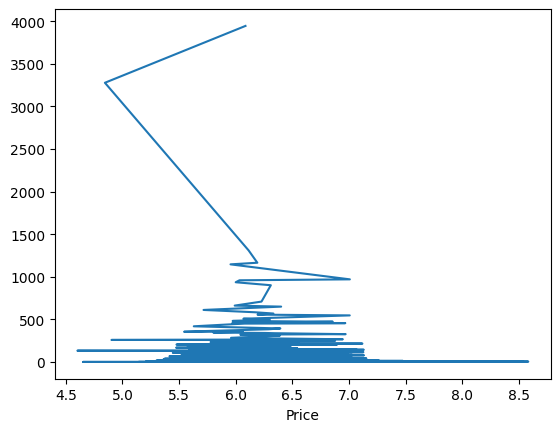

In [304]:
df.Price.value_counts().plot()

In [305]:
df.Price = df.Price.fillna(6)
df.DiscountPercentage = df.DiscountPercentage.fillna(0)

In [306]:
for columnName in df:
    print(columnName, df[columnName].isnull().sum())

Male 0
Price 0
Domestic 0
Cancel 0
TimeDelta 0
VehicleClass_False 0
VehicleClass_True 0
TripReason_Int 0
TripReason_Work 0
Vehicle_Bus 0
Vehicle_InternationalPlane 0
Vehicle_Plane 0
Vehicle_Train 0
ReserveStatus_2 0
ReserveStatus_3 0
ReserveStatus_4 0
ReserveStatus_5 0
DiscountPercentage 0


In [307]:
X_numpy = X.to_numpy().astype(np.float32)
y_numpy = y.to_numpy().astype(int)

In [308]:
X_numpy.shape

(82923, 17)